In [ ]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/metalhacker/GE2324/master/Earthquake_Data.csv"

df = pd.read_csv(url)
df = df.fillna('N/A')
df.head()

Date      Time  Latitude  ...  Location Source Magnitude Source     Status
0  01/02/1965  13:44:18    19.246  ...           ISCGEM           ISCGEM  Automatic
1  01/04/1965  11:29:49     1.863  ...           ISCGEM           ISCGEM  Automatic
2  01/05/1965  18:05:58   -20.579  ...           ISCGEM           ISCGEM  Automatic
3  01/08/1965  18:49:43   -59.076  ...           ISCGEM           ISCGEM  Automatic
4  01/09/1965  13:32:50    11.938  ...           ISCGEM           ISCGEM  Automatic

[5 rows x 21 columns]

#Data Visualization

In [ ]:
l = len(df)
for i in range(0, l):
    try:
        df['Date'][i] = pd.to_datetime(df['Date'][i], utc=True, format="%m/%d/%Y")
    except ValueError:
        df['Date'][i] = pd.to_datetime(df['Date'][i], utc=True, format="%Y-%m-%d %H:%M:%S")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


###Frequency of recorded major earthquakes amoung years

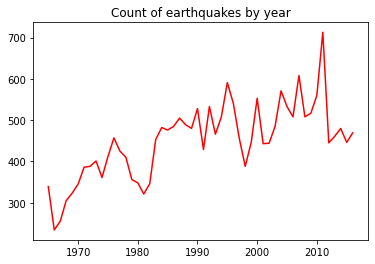

In [ ]:
df['Date'].dt.year.value_counts().sort_index().plot(kind = 'line', color = 'red', title = 'Count of earthquakes by year')

###Histogram on the severeness of the earthquakes

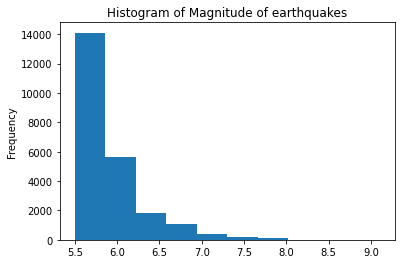

In [ ]:
df['Magnitude'].plot(kind = 'hist', title = 'Histogram of Magnitude of earthquakes')

###Ploting the earthquakes on a world map

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


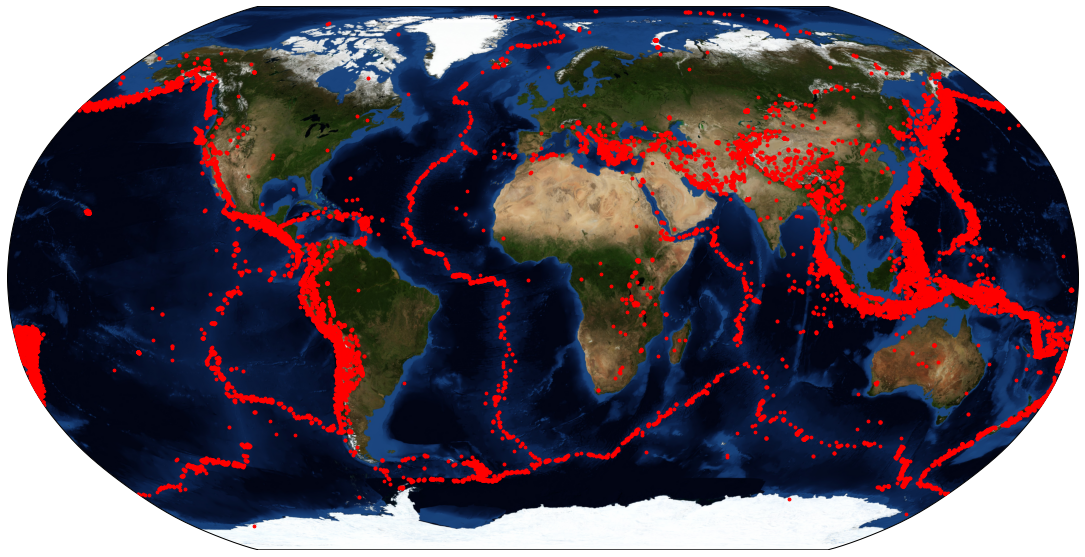

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.figure(figsize=(19.2,10.8))

m = Basemap(projection='robin',lon_0=0,resolution='c')
m.bluemarble()

for index in df.index:
    lat, lon, mag = df.loc[index].values[2], df.loc[index].values[3], df.loc[index].values[8]
    x, y = m(lon, lat)
    m.plot(x, y, 'r.', markersize = mag)

plt.show()

###Earthquake Frequency Heatmap

In [ ]:
import folium
from folium import plugins
from folium.plugins import HeatMap

lat = [item for item in df['Latitude']]
lon = [item for item in df['Longitude']]
loc = [(lat[i], lon[i]) for i in range(0, len(lat))]

hm = folium.Map(location = [35.68, 139.69], zoom_start = 7)
HeatMap(loc).add_to(hm)
hm

#Correlation Analysis

###Correlation of the columns in the original dataset

Pearson Correlation Coefficient

In [ ]:
df.corr(method ='pearson')

Latitude  Longitude     Depth  Magnitude
Latitude   1.000000   0.203546 -0.081020   0.034987
Longitude  0.203546   1.000000 -0.085861   0.038579
Depth     -0.081020  -0.085861  1.000000   0.023457
Magnitude  0.034987   0.038579  0.023457   1.000000

Spearman Correlation Coefficient

In [ ]:
df.corr(method ='spearman')

Latitude  Longitude     Depth  Magnitude
Latitude   1.000000   0.157483 -0.026573   0.033515
Longitude  0.157483   1.000000  0.081777   0.040678
Depth     -0.026573   0.081777  1.000000  -0.038598
Magnitude  0.033515   0.040678 -0.038598   1.000000

Kendall's Tau

In [ ]:
df.corr(method ='kendall')

Latitude  Longitude     Depth  Magnitude
Latitude   1.000000   0.078311 -0.022685   0.023544
Longitude  0.078311   1.000000  0.058549   0.028631
Depth     -0.022685   0.058549  1.000000  -0.027375
Magnitude  0.023544   0.028631 -0.027375   1.000000

There's no direct correlation between any single parameters

###Multiple Correlation Coefficient

The formula of multiple correlation for a dependent varialble $y$ and independent variables $x_1$, $x_2$ is $$R=\frac{\sqrt{r^2_{yx_1}+r^2_{yx_2}-2r_{yx_1}(r_{yx_2})(r_{x_1x_2})}}{\sqrt{1-r^2_{x_1x_2}}}$$

^Reference: http://mtweb.mtsu.edu/stats/regression/level3/multicorrel/multicorrcoef.htm

<br></br>
Let latitude be $x_1$, longitude be $x_2$, we can calculate the correlation for Depth and Magnitude correspondinglly

For Depth:

In [ ]:
import math
r_yx1 = -0.081020
r_yx2 = -0.085861
r_x1x2 = 0.203546
R_depth = math.sqrt(r_yx1**2 + r_yx2**2 - 2*r_yx1*r_yx2*r_x1x2)/math.sqrt(1-r_x1x2**2)
print("R_depth is:", R_depth)

R_depth is: 0.1076307837550821


Therefore, there is most likely no **Linear** correlation between Depth, Latitude and Longitude
<br></br>
Same, for Magnitude:

In [ ]:
import math
r_yx1 = 0.034987
r_yx2 = 0.038579
r_x1x2 = 0.203546
R_magnitude = math.sqrt(r_yx1**2 + r_yx2**2 - 2*r_yx1*r_yx2*r_x1x2)/math.sqrt(1-r_x1x2**2)
print("R_magnitude is:", R_magnitude)

R_magnitude is: 0.047501978056470745


And there is most likely no **Linear** correlation between Magnitude, Latitude and Longitude

#Clustering

###k-Means

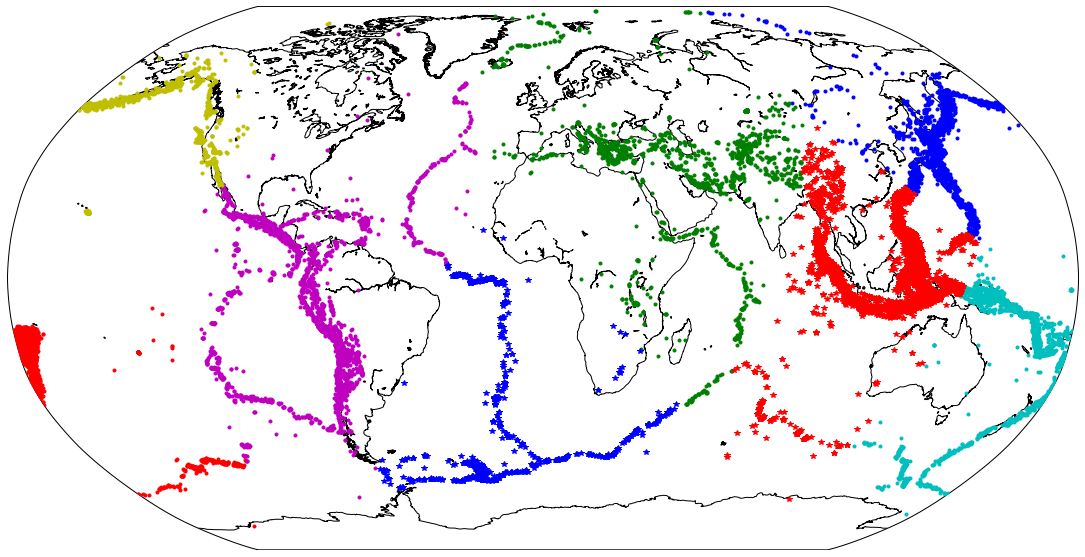

In [ ]:
lat = df['Latitude']
lon = df['Longitude']
geo = df[['Latitude', 'Longitude']].copy()

from sklearn.cluster import KMeans
centroid_n=8
km = KMeans(n_clusters=centroid_n, random_state=0).fit(geo)
labels = km.labels_
plt.figure(figsize=(19.2, 10.8))

m = Basemap(projection='robin',lon_0=0,resolution='l')
m.drawcoastlines()

colors = np.array(['b.','r.','m.','g.','c.','y.','b*','r*','m*','r^']);
for i in range(centroid_n):
    cluster = np.where(labels==i)[0]
    for j in cluster:
        x, y = m(geo.Longitude[j], geo.Latitude[j])
        m.plot(x, y, colors[i])

plt.show()

###DBSCAN

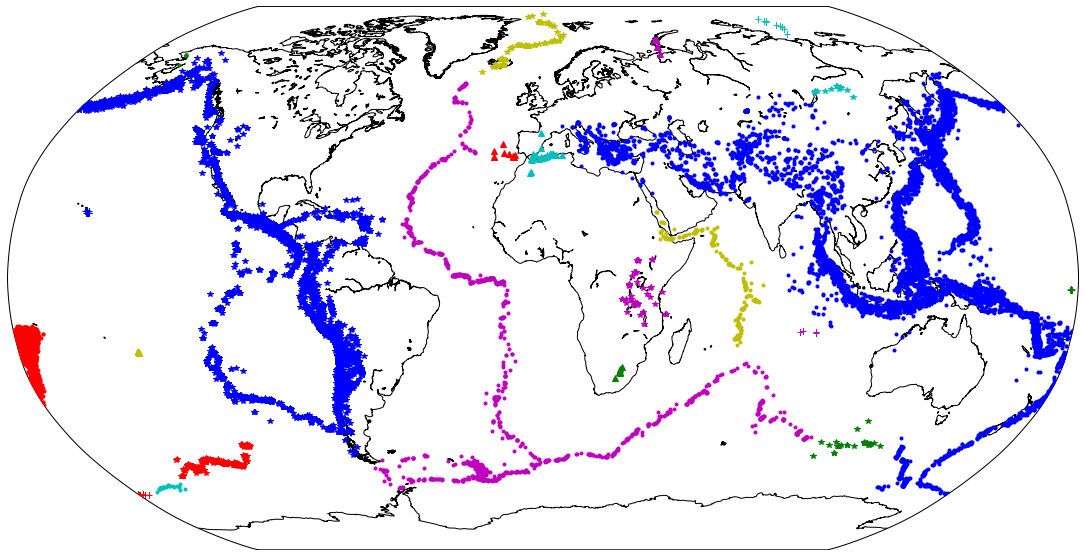

In [ ]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps = 5)
dbs.fit(geo)
labels=dbs.labels_
clusters_n = len(set(labels)) - (1 if -1 in labels else 0)

plt.figure(figsize=(19.2, 10.8))

m = Basemap(projection='robin',lon_0=0,resolution='l')
m.drawcoastlines()

colors = np.array(['b.','r.','m.','b*','g.','c.','y.','r*','m*','g*','c*','y*','r^','b+','m^','g^','c^','y^','r+','m+','g+','c+', 'b-','r-','m-','g-','b^','c-','y-']);
for i in range(clusters_n):
    cluster = np.where(labels==i)[0]
    for j in cluster:
        x, y = m(geo.Longitude[j], geo.Latitude[j])
        m.plot(x, y, colors[i])

plt.show()

#Building Regression Models

##Predicting the Depth of Earthquakes

Preprocessing the data

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
X = df[['Latitude', 'Longitude']]
y = df['Depth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

###k-Nearest-Neighbor

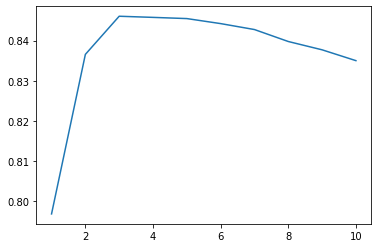

In [ ]:
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
k_range = range(1,11)
knn_scores = {}
knn_scores_list = []

for k in k_range:
    neigh = neighbors.KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X, y)
    scores = cross_val_score(neigh, X, y, cv=10, scoring='r2')
    knn_scores_list.append(scores.mean())

plt.plot(k_range, knn_scores_list)

###Decision Tree Regressor

In [ ]:
from sklearn import tree

dt = tree.DecisionTreeRegressor()
dt.fit(X_train, y_train)
scores = cross_val_score(dt, X_train, y_train, cv=10, scoring='r2')
print("R2 score of Decision Tree Regressor with cross validation is" , scores.mean())

R2 score of Decision Tree Regressor with cross validation is 0.7683666098088849


###Bagging Regressor

In [ ]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
bag = ensemble.BaggingRegressor()
bag.fit(X_train, y_train)
scores = cross_val_score(bag, X_train, y_train, cv=10, scoring='r2')
print("R2 score of Begging Regressor with cross validation is" , scores.mean())

R2 score of Begging Regressor with cross validation is 0.8476147653511508


##Predicting the Severness of Earthquakes (Magnitude + Depth)

Data preprocessing

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_loc = df[['Latitude', 'Longitude']]
y = df[['Magnitude', 'Depth']]
X_train, X_test, y_train, y_test = train_test_split(X_loc, y, test_size = 0.25, random_state = 0)

###k-Nearest-Neighbor

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

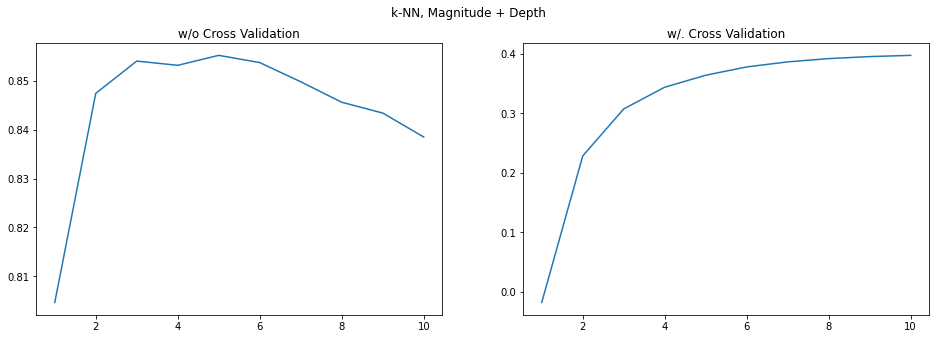

In [ ]:
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
k_range = range(1,11)
knn_scores = {}
knn_scores_list = []
knn_scores_cv = []

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 5))
fig.suptitle('k-NN, Magnitude + Depth')

for k in k_range:
    neigh = neighbors.KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    scores = neigh.score(X_test, y_test)
    knn_scores_list.append(scores)
    knn_scores_cv.append(cross_val_score(neigh, X_train, y_train, cv=10, scoring='r2').mean())

ax1.set_title('w/o Cross Validation')
ax2.set_title('w/. Cross Validation')
ax1.plot(k_range, knn_scores_list)
ax2.plot(k_range, knn_scores_cv)

The result of cross validation reveals that combining magnitude with depth may be causing overfitting issues

###Decision Tree Regressor

In [ ]:
from sklearn import tree

dt = tree.DecisionTreeRegressor(min_samples_split = 100)
dt.fit(X_train, y_train)
dt.predict(X_test)
print(dt.score(X_test, y_test))

import graphviz
import pydotplus
from IPython.display import display,Image
dt_feature_names = list(X_loc.columns)
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, 
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

0.7101646643072973


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


###Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
reg.predict(X_test)
print("R2 score of Begging Regressor without cross validation is" , reg.score(X_test, y_test))
scores = cross_val_score(bag, X_train, y_train, cv=10, scoring='r2')
print("R2 score of Begging Regressor with cross validation is" , scores.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


R2 score of Begging Regressor without cross validation is 0.861123278226215
R2 score of Begging Regressor with cross validation is 0.3158666134333437
